In [1]:
%load_ext autoreload
%autoreload 2

from pl_mae import *

In [15]:
model = pl_MaskedAutoEncoder(lr=1e-4,weight_decay=0,img_size=384,model='mae_vit_large_patch16')

In [ ]:
o = model.configure_optimizers()
o['optimizer']

In [ ]:
x = torch.zeros((2,3,768,768))

train_out = model.training_step(x,0)

In [ ]:
train_out

In [ ]:
from datamodule import mae_DataModule
import pandas as pd
import numpy as np
from pathlib import Path

In [ ]:
files = [str(i) for i in Path('../samples').glob('**/*.npz')]

In [ ]:
ix = np.arange(len(files))
val_ix = np.random.choice(ix,int(.3*len(files)))

In [ ]:
df = pd.DataFrame({'files':files,'mode': ['train']*len(files)})

In [ ]:
df.loc[val_ix,'mode'] = 'val'

In [ ]:
df.to_csv('../samples/meta.csv')

In [16]:
from datamodule import mae_DataModule
dm = mae_DataModule(
    path2csv = '../samples/meta.csv',
    batch_size = 4,
    num_trainloader_workers = 1,
    num_validloader_workers = 1,
    input_size = 384,
    color_jitter = False,
    awaitreprob = False,
    remode = False,
    recount=False,
    reprob=False,
    aa=False)

"aa":                      False
"awaitreprob":             False
"batch_size":              4
"color_jitter":            False
"input_size":              384
"num_trainloader_workers": 1
"num_validloader_workers": 1
"path2csv":                ../samples/meta.csv
"recount":                 False
"remode":                  False
"reprob":                  False


In [17]:
dm.setup(stage='fit')

{'batch_size': 4, 'num_trainloader_workers': 1, 'num_validloader_workers': 1, 'input_size': 384, 'color_jitter': False, 'awaitreprob': False, 'remode': False, 'recount': False, 'path2csv': '../samples/meta.csv', 'reprob': False, 'aa': False}
{'batch_size': 4, 'num_trainloader_workers': 1, 'num_validloader_workers': 1, 'input_size': 384, 'color_jitter': False, 'awaitreprob': False, 'remode': False, 'recount': False, 'path2csv': '../samples/meta.csv', 'reprob': False, 'aa': False}


/Users/robinsongarcia/opt/anaconda3/envs/torch/lib/python3.7/site-packages/torchvision/transforms/transforms.py:330: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  "Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. "


In [18]:
train_loader = dm.train_dataloader()
val_loader = dm.val_dataloader()

In [19]:
batch = next(iter(train_loader))

In [20]:
from callbacks import *

In [22]:
outputs = model(batch)

In [46]:
callback = mae_Callback(to_wandb=False)

In [47]:
class Trainer:
    def __init__(self):
        pass
o = callback.on_train_batch_end(Trainer(), model, outputs, batch, 0, unused=0)

torch.Size([1, 3, 384, 384])
torch.Size([1, 3, 384, 384])
torch.Size([1, 3, 384, 384])
torch.Size([1, 3, 384, 384])
torch.Size([1, 3, 384, 384])
torch.Size([1, 3, 384, 384])
torch.Size([1, 3, 384, 384])
torch.Size([1, 3, 384, 384])


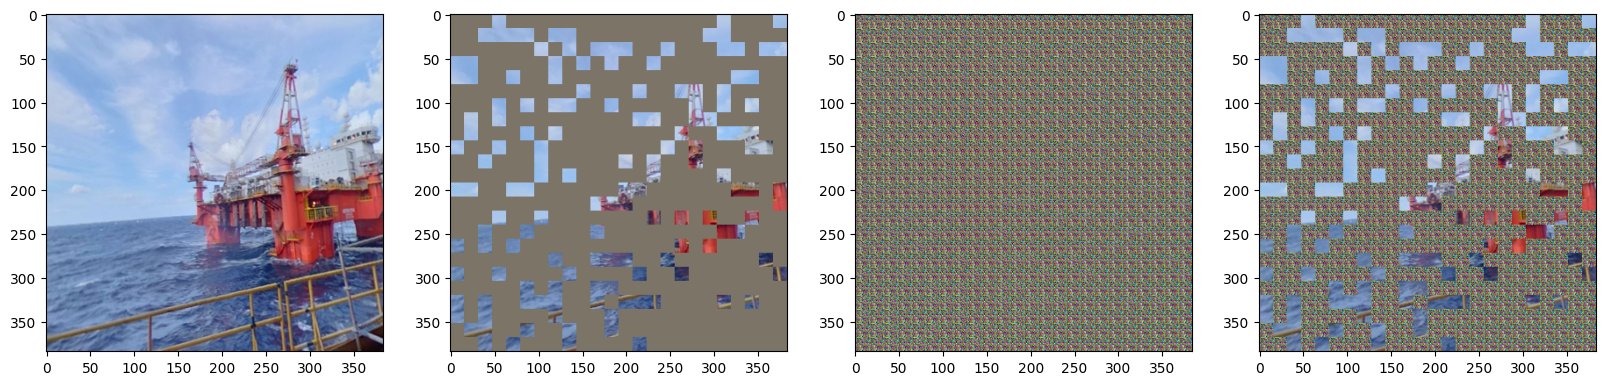

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(o[0][i][0])
plt.show()